<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


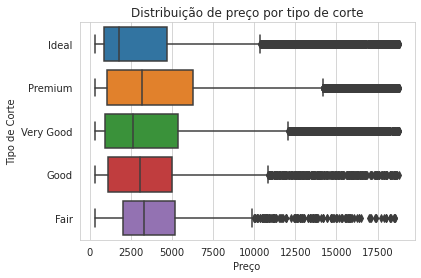

In [13]:
# gráfico do exercício 1

with sns.axes_style('whitegrid'):
 grafico = sns.boxplot(x=data["price"], y=data["cut"])
 grafico.set(title="Distribuição de preço por tipo de corte", xlabel="Preço", \
 ylabel="Tipo de Corte")

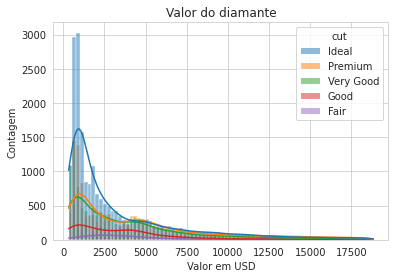

In [11]:
diamonds = data[["price", "cut"]]

with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data=diamonds, x="price", hue="cut", kde=True)
  grafico.set(title='Valor do diamante', xlabel='Valor em USD', ylabel='Contagem')

**Insight do gráfico 1**: os gráficos evidenciam que os outliers de preço de cada corte tende a ser na faixa após os 10.000, os limites inferiores próximos a 0 e os superiores a partir de 10 mil, com o premium tendo limite superior em cerca de 14 mil. No KDE percemos a concentração dos valores entre 2500 e 5000, comprovado pela mediana nos boxplots.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [ ]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

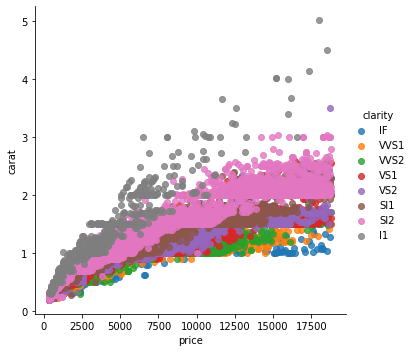

In [14]:
# gráfico do exercício 2

sns.lmplot(y="carat", x="price", hue="clarity", data=data, fit_reg= False)

**Insight do gráfico 2**: os diamantes de clareza I1 são mais sensíveis à variação de preço quanto maior o seu peso, seguido dos diamantes SI2. Os que menos sofrem a variação são os diamantes IF e VVS1, mas nota-se correlação positiva em todos os grupos de claridade.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [15]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


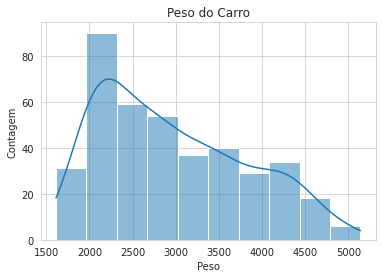

In [16]:
# gráfico do exercício 3

with sns.axes_style('whitegrid'):
  cars = sns.histplot(data=data, x="weight", kde=True)
  cars.set(title='Peso do Carro', xlabel='Peso', ylabel='Contagem');


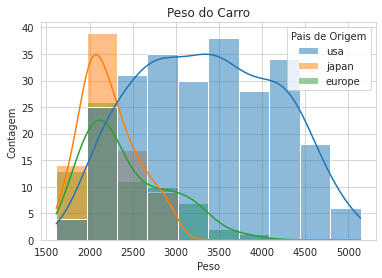

In [19]:
with sns.axes_style('whitegrid'):
  cars = sns.histplot(data=data, x="weight", hue="origin", kde=True)
  cars.set(title='Peso do Carro', xlabel='Peso', ylabel='Contagem');
  cars.get_legend().set_title("Pais de Origem");

**Insight do gráfico 3**: quando olhamos o gráfico geral, percebemos que a distribuição dos dados não segue uma curva normal, com deslocamento para a esquerda e maior ocorrência de carros com peso entre 2000 e 2500.

Ao agruparmos por origem, os carros do japão se distribuem entre 1500 e 3000, com mediana em 2000, os da europa vão entre 1500 e 4000, com mediana semelhante, e os americanos ocupam uma maior faixa do gráfico entre 1500 e 5000, com mediana quase coincidente à média.

---